In [1]:
# loading things in
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# first, lets load in the data
traffic_accidents_uncleaned = pd.read_csv("US_Accidents_March23.csv")

In [6]:
traffic_accidents_uncleaned.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
traffic_accidents_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

Lets do some basic summary statistics!

In [10]:
traffic_accidents_uncleaned.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


# Missing values

In [ ]:
import seaborn as sns
accidents_null = traffic_accidents_uncleaned.isnull()

plt.figure(figsize=(10,10))
sns.heatmap(accidents_null,cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Traffic Accidents Dataset', fontsize=12)
plt.show()

# Adding variables 

In [12]:
traffic_accidents_uncleaned['Start_Time'] = pd.to_datetime(traffic_accidents_uncleaned['Start_Time'],errors='coerce', format='ISO8601')
traffic_accidents_uncleaned['Year'] = traffic_accidents_uncleaned['Start_Time'].dt.year
traffic_accidents_uncleaned['Month'] = traffic_accidents_uncleaned['Start_Time'].dt.month
traffic_accidents_uncleaned['Day'] = traffic_accidents_uncleaned['Start_Time'].dt.day
traffic_accidents_uncleaned['Hour'] = traffic_accidents_uncleaned['Start_Time'].dt.hour
traffic_accidents_uncleaned['DayOfWeek'] = traffic_accidents_uncleaned['Start_Time'].dt.day_name()


In [42]:
import calendar
traffic_accidents_uncleaned['Month'] = traffic_accidents_uncleaned['Month'].apply(lambda x: calendar.month_name[int(x)] if pd.notna(x) else x)

# Feature engineering 

In [71]:
import numpy as np
import holidays
from sklearn.cluster import KMeans
# rush hour
traffic_accidents_uncleaned['rush_hour'] = traffic_accidents_uncleaned['Hour'].isin([7,8,9,16,17,18]).astype(int)
#weekend
traffic_accidents_uncleaned['is_weekend'] = traffic_accidents_uncleaned['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
# us holiday
us_holidays = holidays.US()
traffic_accidents_uncleaned['is_holiday'] = traffic_accidents_uncleaned['Start_Time'].dt.date.astype('datetime64[ns]').isin(us_holidays).astype(int)
# visabl consitions 
traffic_accidents_uncleaned['visibility_bin'] = pd.cut(traffic_accidents_uncleaned['Visibility(mi)'],
                              bins=[0, 1, 5, 10, 50],
                              labels=['Low', 'Medium', 'High', 'Very High'])
# weather groups 
def weather_group(x):
    if pd.isna(x): return np.nan
    x = x.lower()
    if 'rain' in x: return 'Rainy'
    if 'snow' in x: return 'Snowy'
    if 'fog' in x or 'mist' in x or 'haze' in x: return 'Foggy'
    if 'clear' in x: return 'Clear'
    return 'Other'
traffic_accidents_uncleaned['Weather_Group'] = traffic_accidents_uncleaned['Weather_Condition'].apply(weather_group)


In [73]:
traffic_accidents_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 56 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

# Time based trends

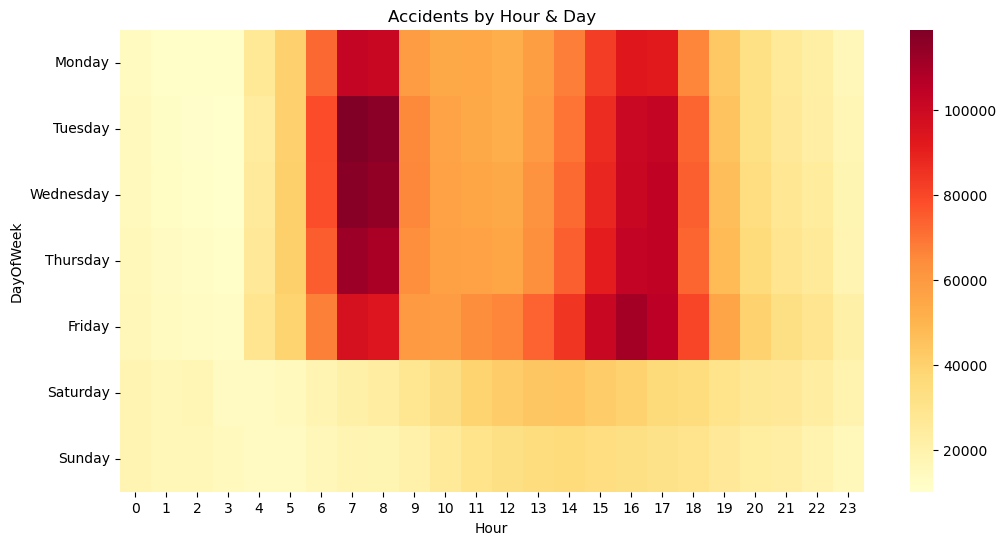

In [32]:
import seaborn as sns
time_heat = traffic_accidents_uncleaned.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
time_heat = time_heat.reindex(day_order)
plt.figure(figsize=(12,6))
sns.heatmap(time_heat, cmap='YlOrRd')
plt.title('Accidents by Hour & Day')
plt.show()

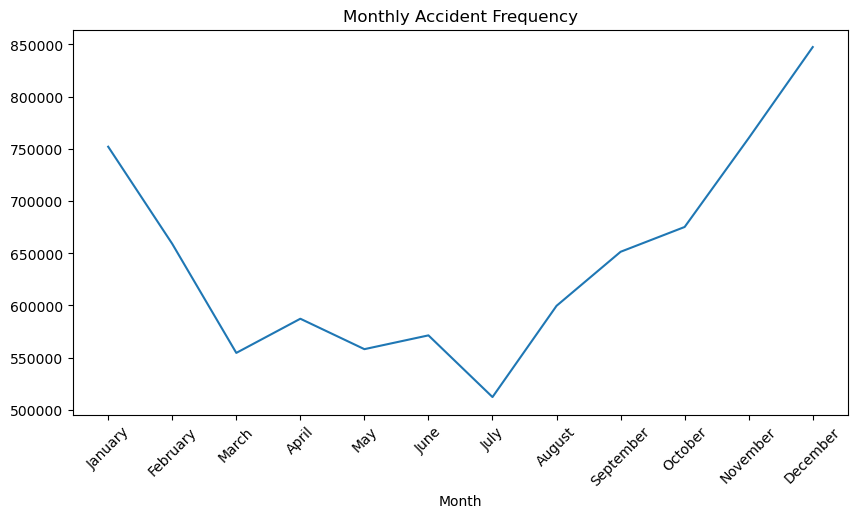

In [44]:
monthly_patterns = traffic_accidents_uncleaned.groupby('Month').size().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_patterns.index, y=monthly_patterns.values)
plt.title('Monthly Accident Frequency')
plt.xticks(rotation=45)
plt.show()

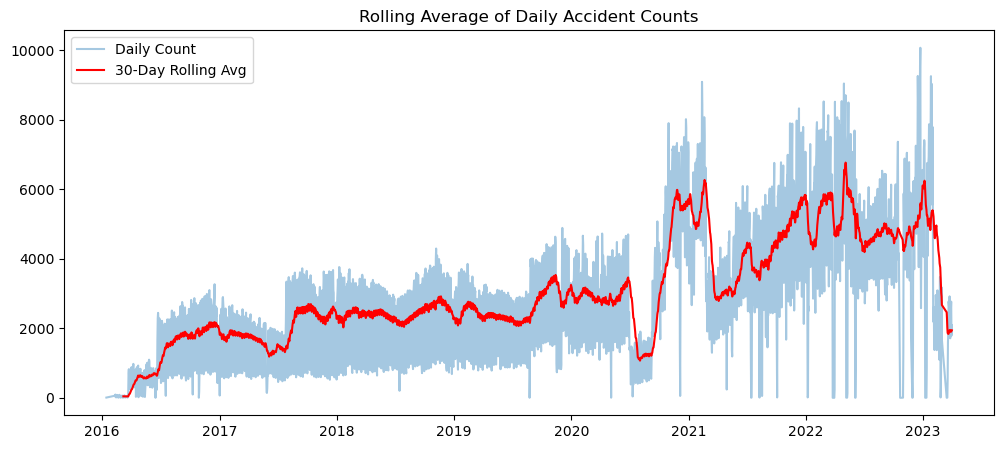

In [46]:
daily_counts = traffic_accidents_uncleaned.groupby(traffic_accidents_uncleaned['Start_Time'].dt.date).size()
rolling = daily_counts.rolling(30).mean()

plt.figure(figsize=(12,5))
plt.plot(daily_counts.index, daily_counts.values, alpha=0.4, label='Daily Count')
plt.plot(rolling.index, rolling.values, color='red', label='30-Day Rolling Avg')
plt.legend()
plt.title('Rolling Average of Daily Accident Counts')
plt.show()

# Weather based analysis 

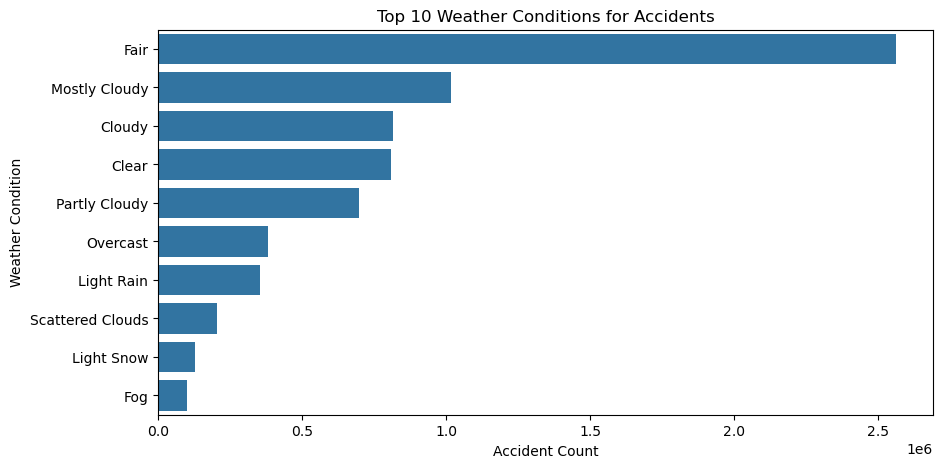

In [49]:
top_weather = traffic_accidents_uncleaned['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title('Top 10 Weather Conditions for Accidents')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.show()

In [53]:
weather_sev = pd.crosstab(traffic_accidents_uncleaned['Weather_Condition'], traffic_accidents_uncleaned['Severity'])
print(weather_sev.head(10))

Severity                 1       2       3      4
Weather_Condition                                
Blowing Dust             1     171      17      0
Blowing Dust / Windy     8     231      19      8
Blowing Sand             0       1       1      0
Blowing Snow             0     567     134     39
Blowing Snow / Windy     0     884      17     24
Blowing Snow Nearby      0       1       0      0
Clear                  337  536971  244956  26479
Cloudy                7985  692929   93340  22828
Cloudy / Windy         104   14393    2083    455
Drifting Snow            0       1       0      0


# Some visualizations

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(2,3,1)
plt.hist(traffic_accidents_uncleaned["Temperature(F)"])
plt.subplot(2,3,2)
plt.hist(traffic_accidents_uncleaned["Wind_Chill(F)"])
plt.subplot(2,3,3)
plt.hist(traffic_accidents_uncleaned["Humidity(%)"])
plt.subplot(2,3,4)
plt.hist(traffic_accidents_uncleaned["Visibility(mi)"])
plt.subplot(2,3,5)
plt.hist(traffic_accidents_uncleaned["Wind_Speed(mph)"])
plt.subplot(2,3,6)
plt.hist(traffic_accidents_uncleaned["Precipitation(in)"])

In [ ]:
import seaborn as sns
sns.countplot(x='Crossing', data=traffic_accidents_uncleaned)

# Model preparation

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import joblib

traffic_copy = traffic_accidents_uncleaned.copy()

In [85]:
# target: binary risk (1 = High risk, 0 = Low/Medium)
traffic_copy['HighSeverity'] = (traffic_copy['Severity'] > 2).astype(int)


In [87]:
# numeric and categorical columns
numeric_features = ['Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)', 'Pressure(in)']
categorical_features = ['Weather_Group', 'visibility_bin', 'rush_hour', 'is_weekend', 'is_holiday']

# drop rows with missing relevant values
traffic_copy = traffic_copy.dropna(subset=numeric_features + categorical_features + ['HighSeverity'])

In [91]:
X = traffic_copy[numeric_features + categorical_features]
y = traffic_copy['HighSeverity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [93]:
# scaling 
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

In [95]:
# encoding 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train_scaled[categorical_features])
X_test_cat = encoder.transform(X_test_scaled[categorical_features])
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled[numeric_features], index=X_train_scaled.index),
    pd.DataFrame(X_train_cat, columns=encoded_cols, index=X_train_scaled.index)
], axis=1)
X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled[numeric_features], index=X_test_scaled.index),
    pd.DataFrame(X_test_cat, columns=encoded_cols, index=X_test_scaled.index)
], axis=1)

print("Final shape:", X_train_final.shape)


Final shape: (5658814, 19)


=== Logistic Regression Results ===
              precision    recall  f1-score   support

           0       0.84      0.70      0.76   1150906
           1       0.24      0.43      0.31    263798

    accuracy                           0.65   1414704
   macro avg       0.54      0.56      0.54   1414704
weighted avg       0.73      0.65      0.68   1414704

ROC-AUC: 0.592


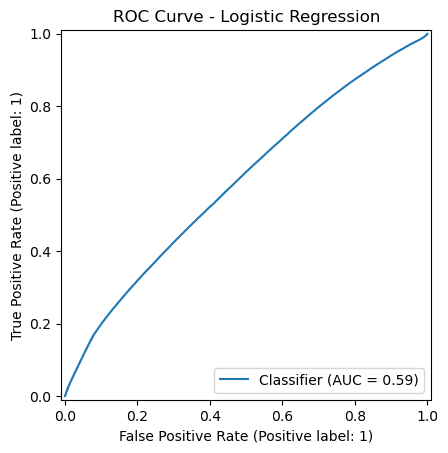

In [99]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_final, y_train)

y_pred = log_reg.predict(X_test_final)
y_prob = log_reg.predict_proba(X_test_final)[:, 1]
print("=== Logistic Regression Results ===")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - Logistic Regression")
plt.show()